In [12]:
import dolfyn
import numpy as np
from dolfyn.adp import api
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as dt



In [2]:

adcpPath= r'C:\Users\cesposito\The Water Institute of the Gulf\P-00703_NSF_Caltech - General\Data\Tulane-LSU_2022Data\StationaryADCP\StationaryADCP_4_25_22\SouthPass1_000_22-04-25_163941.PD0'

ens=[133, 196]


In [3]:



ds=dolfyn.read(adcpPath)

ds



Reading file C:\Users\cesposito\The Water Institute of the Gulf\P-00703_NSF_Caltech - General\Data\Tulane-LSU_2022Data\StationaryADCP\StationaryADCP_4_25_22\SouthPass1_000_22-04-25_163941.PD0 ...


<xarray.Dataset>
Dimensions:              (time: 2063, dir: 4, range: 37, beam: 4, x: 4, x*: 4,
                          earth: 3, inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2022-04-25T16:40:52.490000009 ...
  * dir                  (dir) <U3 'X' 'Y' 'Z' 'err'
  * range                (range) float64 0.9 1.4 1.9 2.4 ... 17.4 17.9 18.4 18.9
  * beam                 (beam) int32 1 2 3 4
  * x                    (x) int32 1 2 3 4
  * x*                   (x*) int32 1 2 3 4
  * earth                (earth) <U1 'E' 'N' 'U'
  * inst                 (inst) <U1 'X' 'Y' 'Z'
Data variables: (12/26)
    number               (time) uint32 116 117 118 119 ... 2175 2176 2177 2178
    builtin_test_fail    (time) bool False False False ... False False False
    c_sound              (time) float32 1.477e+03 1.477e+03 ... 1.477e+03
    depth                (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pitch                (time) float32 0.62 0.73 0.82 0.86 ... 0.6 0.72 0.88
    roll                 (time) float32 4.67 4.75 4.87 4.74 ... 4.28 4.26 4.35
    ...                   ...
    vel_bt               (dir, time) float32 0.047 0.045 0.081 ... 0.001 0.001
    corr_bt              (beam, time) uint8 255 255 255 255 ... 255 254 254 248
    amp_bt               (beam, time) uint8 60 55 55 56 56 55 ... 65 66 68 70 67
    prcnt_gd_bt          (beam, time) uint8 0 0 0 0 0 0 ... 100 100 100 100 100
    beam2inst_orientmat  (x, x*) float64 1.462 -1.462 0.0 ... -1.034 -1.034
    orientmat            (earth, inst, time) float64 0.4659 0.4658 ... 1.0 1.0
Attributes: (12/37)
    inst_make:                TRDI
    inst_type:                ADCP
    rotate_vars:              ['vel', 'vel_bt']
    has_imu:                  0
    prog_ver:                 10.17
    inst_model:               Rio Grande
    ...                       ...
    water_ref_cells:          [0, 5]
    false_target_threshold:   50
    transmit_lag_m:           0.16
    bandwidth:                0
    fs:                       5.0
    vel_gps_corrected:        0

In [4]:

t = dolfyn.time.dt642date(ds.time)

V1=ds['vel']
V2=ds['vel']-ds['vel_bt']
V3=np.linalg.norm(V2,axis=0)

dd=ds['prcnt_gd'].sum(dim='beam')
print(dd.shape)



(37, 2063)


In [5]:
# Calculate the mean distance for each time
mean_dist = ds["dist_bt"].mean(dim=["beam"])

# Create a boolean mask where the condition is true
mask = mean_dist > ds["range"]

V_masked=ds["vel"].where(mask, np.nan)
#ds['vel_bt']=ds["vel_bt"].where(~mask, 1,-999)
#V4=np.linalg.norm(ds['vel']-ds['vel_bt'],axis=0)
V_mag=np.linalg.norm(V_masked,axis=0)

print(mean_dist.shape)
print(mask.shape)
print(V_mag.shape)
print(ds.vel.shape)

(2063,)
(37, 2063)
(37, 2063)
(4, 37, 2063)


In [6]:

#remove data that is in the bin that contains the bed depth, as well as the two bins above that



0
1
2
3


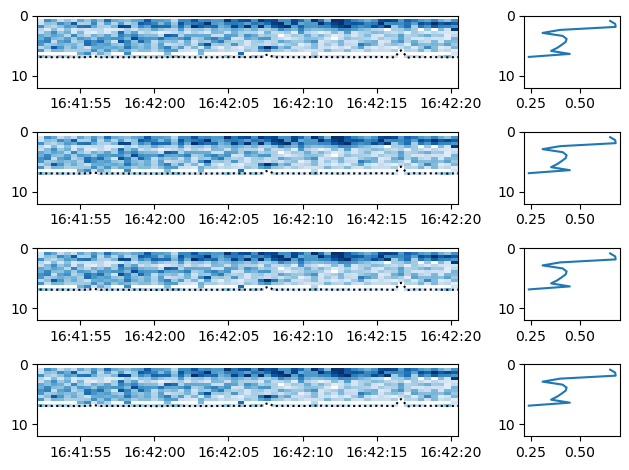

In [48]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(4, 4)

for i in range(0,4):

    ax = fig.add_subplot(gs[i,0:3])
    pcm = ax.pcolormesh(t[ens[0]:ens[1]], ds['range'], V_mag[:,ens[0]:ens[1]], cmap='Blues', shading='nearest')
    ax.set_ylim([12, 0])
    pcm.set_clim([0, 1])
    ax.plot(t, ds.dist_bt.mean(dim=["beam"],),'k:')

    ax = fig.add_subplot(gs[i,3])
    ax.plot(np.nanmean(V_mag[:,ens[0]:ens[1]],axis=1),ds['range'])
    ax.set_ylim([12, 0])

    print(i)

# Add colorbar
#cbar = plt.colorbar(pcm, ax=ax)
#cbar.set_label('Velocity')  # You can set your desired label here


# Set up time on x-axis
#ax.set_xlabel('Time')
#ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

#ax.set_ylabel('Altitude [m]')
#ax.set_ylim([12, 0])

#plt.clim(0,100)
#plt.colorbar(label='Horizontal Vel [m/s]')


In [32]:
ds['range']

<xarray.DataArray 'range' (range: 37)>
array([ 0.9,  1.4,  1.9,  2.4,  2.9,  3.4,  3.9,  4.4,  4.9,  5.4,  5.9,  6.4,
        6.9,  7.4,  7.9,  8.4,  8.9,  9.4,  9.9, 10.4, 10.9, 11.4, 11.9, 12.4,
       12.9, 13.4, 13.9, 14.4, 14.9, 15.4, 15.9, 16.4, 16.9, 17.4, 17.9, 18.4,
       18.9])
Coordinates:
  * range    (range) float64 0.9 1.4 1.9 2.4 2.9 ... 16.9 17.4 17.9 18.4 18.9
Attributes:
    coverage_content_type:  coordinate
    units:                  m
    long_name:              Profile Range
    description:            Distance to the center of each depth bin

In [42]:
np.nanmean(V_mag[:,ens[0]:ens[1]],axis=1)

array([0.6532184 , 0.6790457 , 0.6813014 , 0.39914158, 0.31031504,
       0.41218558, 0.43236825, 0.4276481 , 0.40663612, 0.3841857 ,
       0.3535621 , 0.44854125, 0.24058908,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan], dtype=float32)

In [8]:

print(axs[0])

Axes(0.125,0.712609;0.775x0.167391)


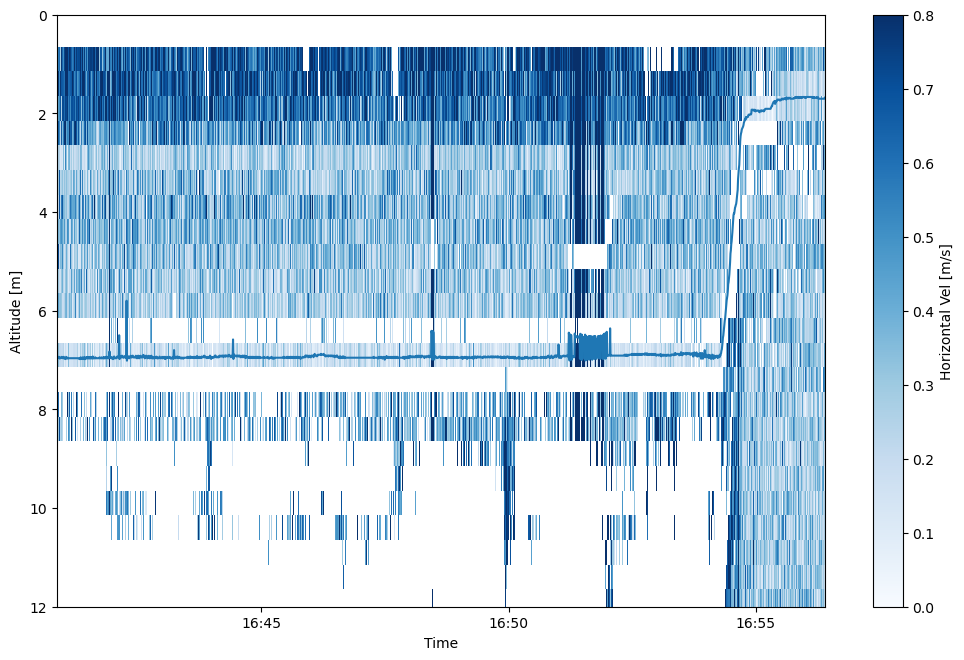

In [9]:
ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
plt.pcolormesh(t, ds['range'], V3, cmap='Blues', shading='nearest')

# Plot the bed
#ax.plot(t, ds.dist_bt[0,:])
#ax.plot(t, ds.dist_bt[1,:])
#ax.plot(t, ds.dist_bt[2,:])
#ax.plot(t, ds.dist_bt[3,:])
ax.plot(t, ds.dist_bt.mean(dim=["beam"]))

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([12, 0])

plt.clim(0,0.8)
plt.colorbar(label='Horizontal Vel [m/s]')

In [10]:
""" api.clean.find_surface(ds, thresh=10000000)
ds.depth """


ds['U_mag'] = ds.velds.U_mag
ds['U_dir'] = ds.velds.U_dir

#rotate data to ENU coordinates
dolfyn.set_declination(ds, 4)  # 10 degrees East
dolfyn.rotate2(ds, 'Inst')

ds['U_mag2'] = ds.velds.U_mag
ds['U_dir2'] = ds.velds.U_dir


ds

Data is already in the Inst coordinate system


ValueError: The input must be in inst coordinates.

In [ ]:
# Plot flow speed
t = dolfyn.time.dt642date(ds.time)



velMagHoriz=np.linalg.norm(ds.vel[:2,:,:],axis=0)
velMagHoriz.shape


In [ ]:

ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
plt.pcolormesh(t, ds['range'], V, cmap='Blues', shading='nearest')
# Plot the water surface
#ax.plot(t, ds.dist_bt[0,:])
#ax.plot(t, ds.dist_bt[1,:])
#ax.plot(t, ds.dist_bt[2,:])
#ax.plot(t, ds.dist_bt[3,:])
ax.plot(t, ds.dist_bt.mean(dim=["beam"]))

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([12, 0])

plt.clim(0,2)
plt.colorbar(label='Horizontal Vel [m/s]')



In [ ]:
ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
# Plot flow speed
t = dolfyn.time.dt642date(ds.time)
plt.pcolormesh(t, ds['range'], ds['U_mag2'], cmap='Blues', shading='nearest')
# Plot the water surface
ax.plot(t, ds.dist_bt[0,:])

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([12, 0])

plt.clim(0,2)
plt.colorbar(label='Horizontal Vel [m/s]')


In [ ]:



ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
# Plot flow speed
t = dolfyn.time.dt642date(dsU.time)

# Plot the depth
ax.plot(t, ds.depth)

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, -2])


In [ ]:
ds['amp'].sel(beam=1)

In [ ]:

dsU['U_mag']=ds.velds.U_mag
dsU



In [ ]:


ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
# Plot flow speed
t = dolfyn.time.dt642date(dsU.time)
plt.pcolormesh(t, dsU['range'], dsU['U_mag'], cmap='Blues', shading='nearest')


# Plot the depth
ax.plot(t, ds.depth)

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])
plt.colorbar(label='Horizontal Vel [m/s]')
plt.clim(0,1)




In [ ]:

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])
plt.colorbar(label='Horizontal Vel [m/s]')
plt.clim(0,1)

In [ ]:

ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])

plt.pcolormesh(t, dsU['range'], ds['amp'].sel(beam=1), cmap='Reds', shading='nearest')
# Plot the water surface
ax.plot(t, ds['depth'])

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])

plt.colorbar(label='Amplitude beam 1')
plt.clim(0,256)


###

ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])

plt.pcolormesh(t, dsU['range'], ds['amp'].sel(beam=2), cmap='Reds', shading='nearest')
# Plot the water surface
ax.plot(t, ds['depth'])

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])

plt.colorbar(label='Amplitude beam 2')
plt.clim(0,256)

###

ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])

plt.pcolormesh(t, dsU['range'], ds['amp'].sel(beam=3), cmap='Reds', shading='nearest')
# Plot the water surface
ax.plot(t, ds['depth'])

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])

plt.colorbar(label='Amplitude beam 3')
plt.clim(0,256)


###

ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])

plt.pcolormesh(t, dsU['range'], ds['amp'].sel(beam=4), cmap='Reds', shading='nearest')
# Plot the water surface
ax.plot(t, ds['depth'])

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([18, 0])

plt.colorbar(label='Amplitude beam 4')
plt.clim(0,256)

